In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.spatial.distance import pdist, squareform
from scipy.linalg import eigh

# Cargar los datos
df = pd.read_csv('Data1_procesados/1.csv')

# Seleccionar solo los primeros 7 días
df_7days = df[df['Fecha'].isin(df['Fecha'].unique()[:7])]


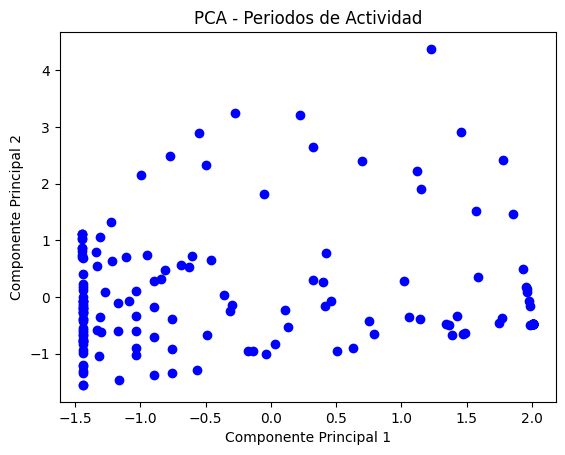

In [ ]:
# Estandarizar datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_7days[["period eating", "period other", "period resting", "period rumination"]])

# Aplicar PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Graficar resultados
plt.scatter(pca_results[:, 0], pca_results[:, 1], c='blue')
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("PCA - Periodos de Actividad")
plt.show()


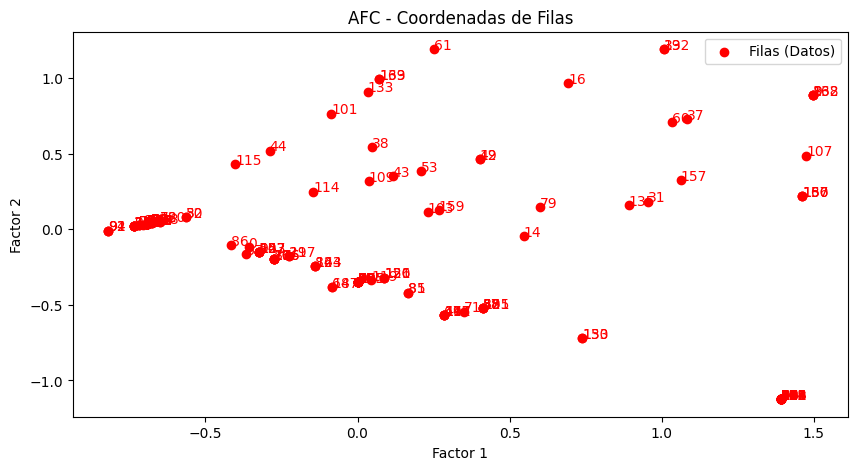

C:\Users\PC\AppData\Local\Temp\ipykernel_9516\3869812777.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (col_coords[0][i], col_coords[1][i]), color="green")


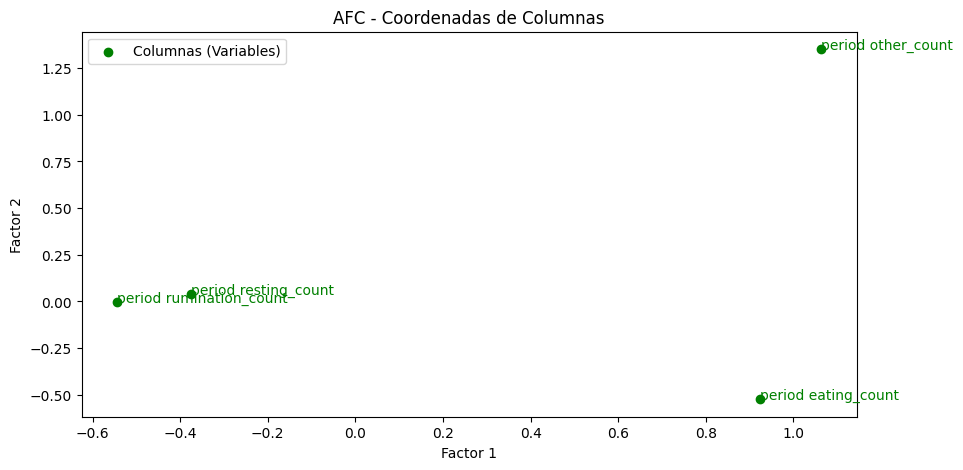

In [38]:
import matplotlib.pyplot as plt
import prince

# Seleccionar solo las columnas de conteo para AFC
count_data = df_7days[["period eating_count", "period other_count", "period resting_count", "period rumination_count"]]

# Aplicar AFC a las columnas de conteo
ca = prince.CA(n_components=2, n_iter=10)
ca = ca.fit(count_data)

# Obtener coordenadas de filas y columnas
row_coords = ca.row_coordinates(count_data)
col_coords = ca.column_coordinates(count_data)

# Graficar coordenadas de filas
plt.figure(figsize=(10, 5))
plt.scatter(row_coords[0], row_coords[1], color="red", label="Filas (Datos)")
for i, txt in enumerate(count_data.index):
    plt.annotate(txt, (row_coords[0][i], row_coords[1][i]), color="red")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("AFC - Coordenadas de Filas")
plt.legend()
plt.show()

# Graficar coordenadas de columnas
plt.figure(figsize=(10, 5))
plt.scatter(col_coords[0], col_coords[1], color="green", label="Columnas (Variables)")
for i, txt in enumerate(count_data.columns):  # Ajustar a las columnas de conteo
    plt.annotate(txt, (col_coords[0][i], col_coords[1][i]), color="green")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.title("AFC - Coordenadas de Columnas")
plt.legend()
plt.show()
